# Import libraries
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

# Read data
---

In [16]:
df_btc_usd = yf.download('BTC-USD', start='2014-09-17')

display(df_btc_usd)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...
2025-07-06,109232.070312,109731.625000,107847.015625,108231.187500,36746020463
2025-07-07,108299.851562,109710.250000,107527.054688,109235.328125,45415696597


In [23]:
df_btc_usd.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

df_btc_usd['Adj Close'] = df_btc_usd['Close']

In [24]:
df_btc_usd

,Date,Close,High,Low,Open,Volume,Adj Close
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,457.334015
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,424.440002
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,394.795990
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,408.903992
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,398.821014
...,...,...,...,...,...,...,...
3945,2025-07-06,109232.070312,109731.625000,107847.015625,108231.187500,36746020463,109232.070312
3946,2025-07-07,108299.851562,109710.250000,107527.054688,109235.328125,45415696597,108299.851562
3947,2025-07-08,108950.273438,109198.968750,107499.554688,108298.226562,44282204127,108950.273438
3948,2025-07-09,111326.554688,111925.375000,108357.679688,108950.273438,57927418065,111326.554688


# Data treatment
---

In [25]:
# Check data type

df_btc_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3950 non-null   datetime64[ns]
 1   Close      3950 non-null   float64       
 2   High       3950 non-null   float64       
 3   Low        3950 non-null   float64       
 4   Open       3950 non-null   float64       
 5   Volume     3950 non-null   int64         
 6   Adj Close  3950 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 216.1 KB


In [26]:
df_btc_usd['Date'] = pd.to_datetime(df_btc_usd['Date'])

Adjusted Close - Reflects real market value changes, considering splits or dividends

Percentage Change - Refers to the percentage change in a stock’s price

In [27]:
# Add Percent Change on the df

df_btc_usd['Auto_pct'] = df_btc_usd['Adj Close'].pct_change()

In [28]:
min_date = min(df_btc_usd['Date'])
max_date = max(df_btc_usd['Date'])

print(f'Min Date: {min_date}')
print(f'Max Date: {max_date}')

Min Date: 2014-09-17 00:00:00
Max Date: 2025-07-11 00:00:00


In [29]:
# Checking null values

df_btc_usd.isnull().sum()

Date         0
Close        0
High         0
Low          0
Open         0
Volume       0
Adj Close    0
Auto_pct     1
dtype: int64

Auto_pct contains 1 null values of the first row, It's ok, but we'll remove

In [30]:
df_btc_usd = df_btc_usd.dropna()

# Data Analytics
---

## Statistical describe

In [31]:
df_btc_usd_describe = df_btc_usd.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

display(df_btc_usd_describe)

,Date,Close,High,Low,Open,Volume,Adj Close,Auto_pct
count,3949,3949.000000,3949.000000,3949.000000,3949.000000,3.949000e+03,3949.000000,3949.000000
mean,2020-02-13 00:00:21.878957056,23323.229600,23794.270356,22775.785825,23296.303070,1.983229e+10,23323.229600,0.002046
min,2014-09-18 00:00:00,178.102997,211.731003,171.509995,176.897003,5.914570e+06,178.102997,-0.371695
1%,2014-10-27 11:31:12,226.549324,230.542155,222.680596,226.464996,1.316370e+07,226.549324,-0.100660
25%,2017-06-01 00:00:00,2273.429932,2363.250000,2164.770020,2255.360107,9.415660e+08,2273.429932,-0.012478
50%,2020-02-13 00:00:00,10058.799805,10234.799805,9726.002930,10038.421875,1.601393e+10,10058.799805,0.001297
75%,2022-10-27 00:00:00,37476.957031,38576.261719,36399.605469,37454.191406,3.125210e+10,37476.957031,0.016541
99%,2025-05-31 12:28:48,105629.214063,106709.703125,103964.973750,105611.699063,8.699753e+10,105629.214063,0.105792
max,2025-07-11 00:00:00,115927.812500,116021.031250,115305.195312,115984.171875,3.509679e+11,115927.812500,0.252472
std,NaN,27280.843518,27775.027207,26701.414285,27248.527910,2.106754e+10,27280.843518,0.035723


In [32]:
for i in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Auto_pct']:
    
    print(f'Column >> {i}')
    print(f"Min to 1% difference = {((df_btc_usd_describe.at['1%', i]/df_btc_usd_describe.at['min', i])-1)*100} %")    
    print(f"99% to Max difference = {((df_btc_usd_describe.at['max', i]/df_btc_usd_describe.at['99%', i])-1)*100} %")
    print('-'*50)

Column >> Open
Min to 1% difference = 28.020820966086625 %
99% to Max difference = 9.821329364620546 %
--------------------------------------------------
Column >> High
Min to 1% difference = 8.884458154124065 %
99% to Max difference = 8.72584952662898 %
--------------------------------------------------
Column >> Low
Min to 1% difference = 29.83534653092741 %
99% to Max difference = 10.907732819487205 %
--------------------------------------------------
Column >> Close
Min to 1% difference = 27.20129833746252 %
99% to Max difference = 9.749763385919351 %
--------------------------------------------------
Column >> Adj Close
Min to 1% difference = 27.20129833746252 %
99% to Max difference = 9.749763385919351 %
--------------------------------------------------
Column >> Volume
Min to 1% difference = 122.56400718902647 %
99% to Max difference = 303.42289412305104 %
--------------------------------------------------
Column >> Auto_pct
Min to 1% difference = -72.9186617060962 %
99% to Max

All price variables: Open, High, Low, Close, Adj Close have close percentage variability, what's expect.

The Volume variable, have huge differences between Min - 1% and 99% - Max values. That's indicate high variability on trading numbers.

The Auto_pct variable, have big differences between Min - 1% and 99% - Max values. That's indicate that a significant devaluation and valuation in specific days.

## Line plot of High and Low Price (USD) over time

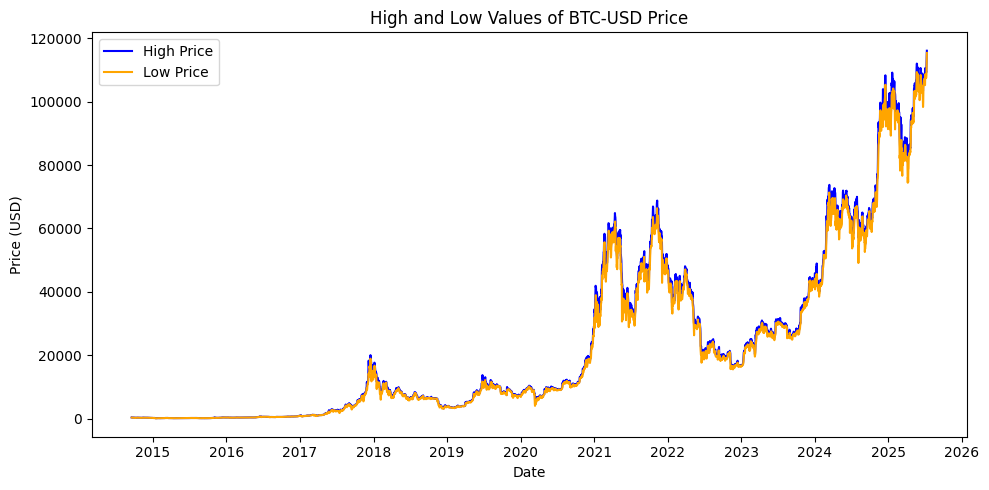

In [33]:
plt.figure(figsize=(10, 5))

plt.plot(df_btc_usd['Date'], df_btc_usd['High'], label='High Price', color='blue')
plt.plot(df_btc_usd['Date'], df_btc_usd['Low'], label='Low Price', color='orange')

plt.title('High and Low Values of BTC-USD Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend()
plt.grid(False)
plt.tight_layout()

plt.show()

## Bar plot of Daily Percentage Change over time

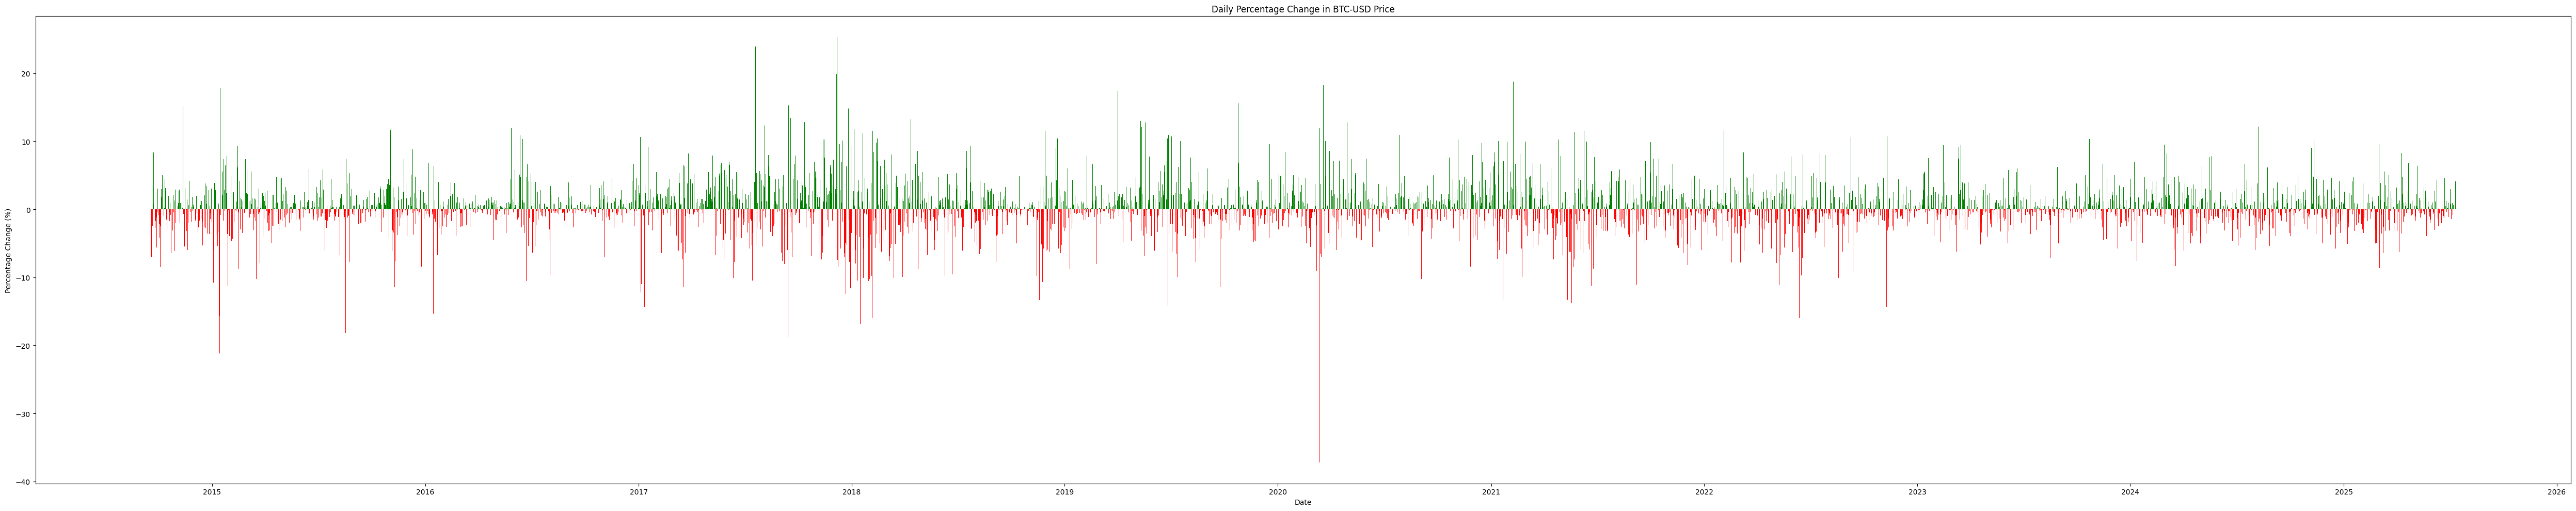

In [34]:
plt.figure(figsize=(50, 10))

colors = df_btc_usd['Auto_pct'].apply(lambda x: 'green' if x > 0 else 'red')

plt.bar(df_btc_usd['Date'], (df_btc_usd['Auto_pct'])*100, color=colors)

plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.title('Daily Percentage Change in BTC-USD Price')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()

plt.show()

In [35]:
min_auto_pct = min(df_btc_usd['Auto_pct'])
row_df_min_auto_pct = df_btc_usd.loc[df_btc_usd['Auto_pct'] == min_auto_pct]

display(row_df_min_auto_pct)

,Date,Close,High,Low,Open,Volume,Adj Close,Auto_pct
2003,2020-03-12,4970.788086,7929.116211,4860.354004,7913.616211,53980357243,4970.788086,-0.371695


In [36]:
max_auto_pct = max(df_btc_usd['Auto_pct'])
row_df_max_auto_pct = df_btc_usd.loc[df_btc_usd['Auto_pct'] == max_auto_pct]

display(row_df_max_auto_pct)

,Date,Close,High,Low,Open,Volume,Adj Close,Auto_pct
1177,2017-12-07,17899.699219,17899.699219,14057.299805,14266.099609,17950699520,17899.699219,0.252472


## Blox plot of Daily Percentage Change

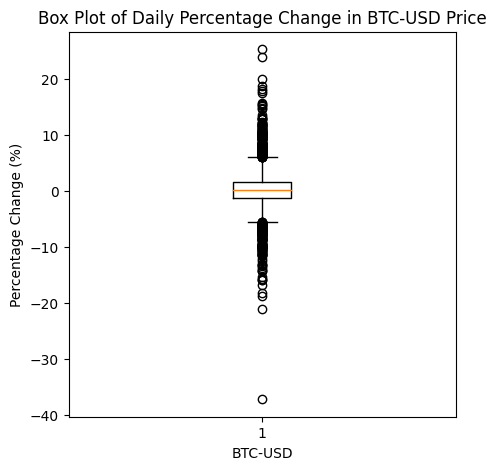

In [37]:
plt.figure(figsize=(5,5))

plt.boxplot(df_btc_usd['Auto_pct']*100, vert=True)

plt.title('Box Plot of Daily Percentage Change in BTC-USD Price')
plt.ylabel('Percentage Change (%)')
plt.xlabel('BTC-USD')

plt.show()

## Line plot of Cumulative Daily Percentage Change in BTC-USD Price over time

C:\Users\math_\AppData\Local\Temp\ipykernel_15608\3241450464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc_usd['Cumulative_Auto_pct'] = df_btc_usd['Auto_pct'].cumsum()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


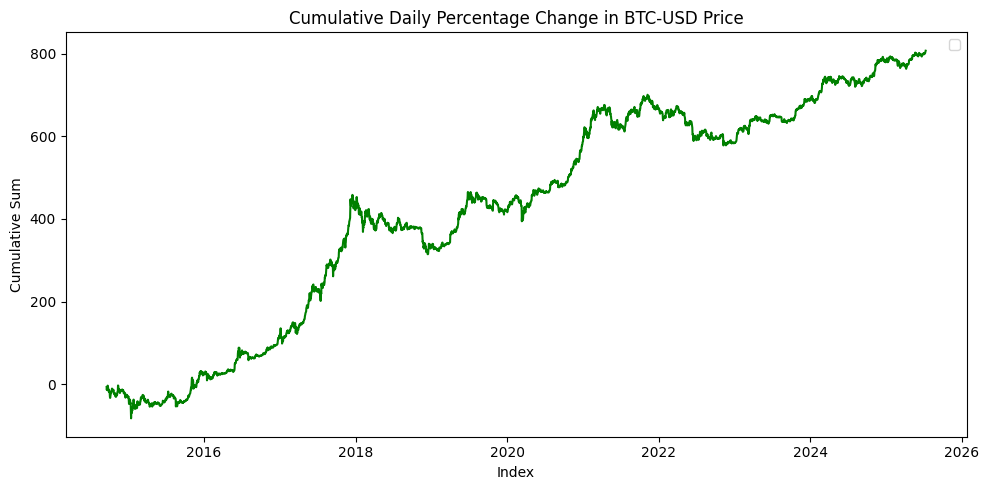

In [38]:
df_btc_usd['Cumulative_Auto_pct'] = df_btc_usd['Auto_pct'].cumsum()

plt.figure(figsize=(10, 5))

plt.plot(df_btc_usd['Date'], df_btc_usd['Cumulative_Auto_pct']*100, linestyle='-', color='green')

plt.title('Cumulative Daily Percentage Change in BTC-USD Price')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')

plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()


## Bar plot of Volume over time

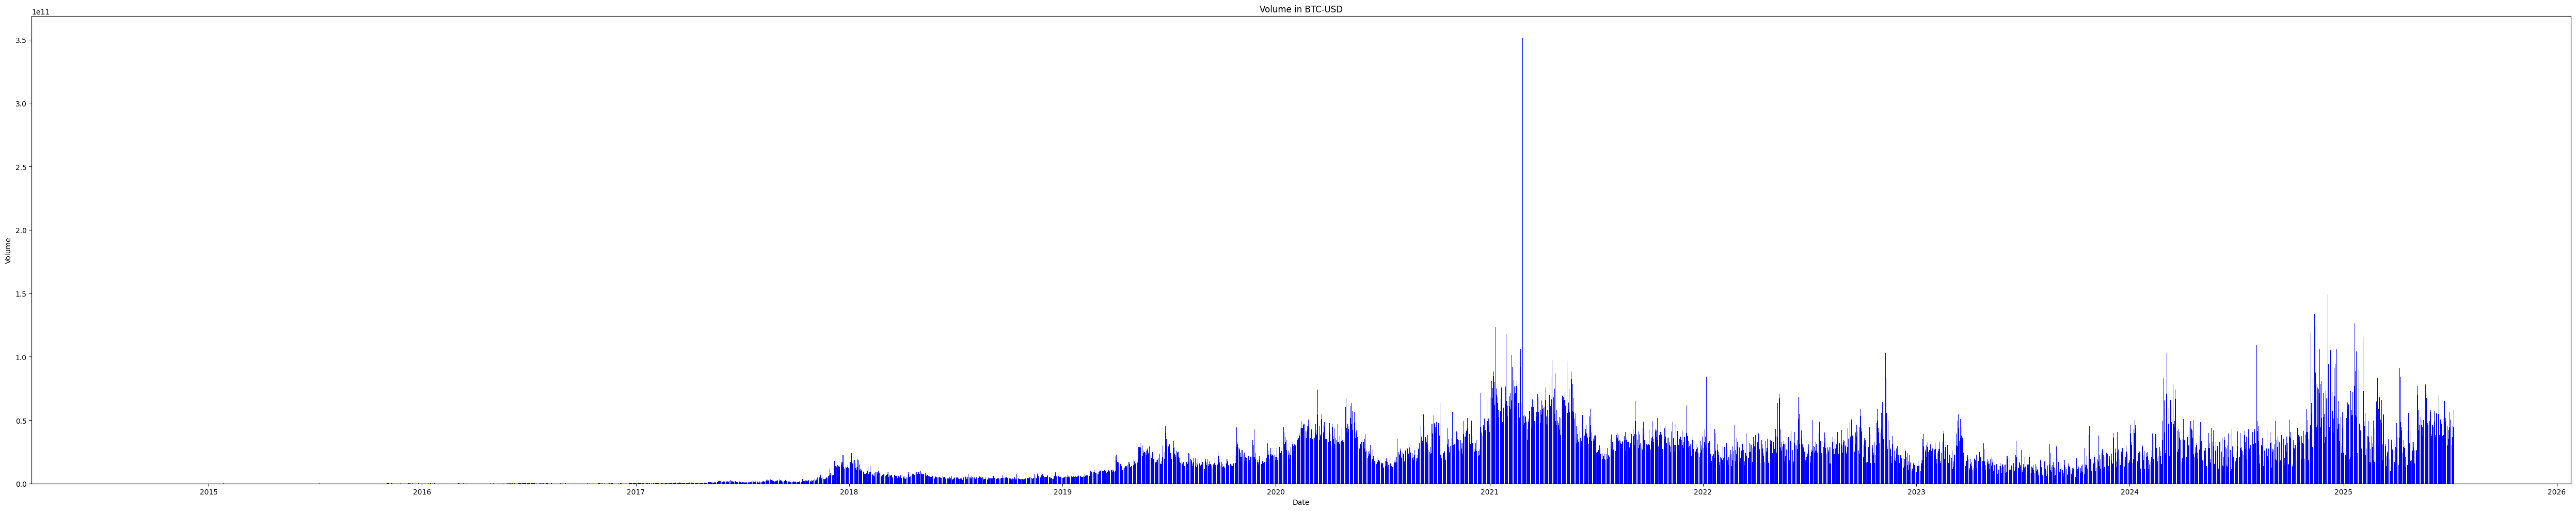

In [39]:
plt.figure(figsize=(50,10))

plt.bar(df_btc_usd['Date'], df_btc_usd['Volume'], color='blue')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume in BTC-USD')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()

plt.show()

In [40]:
min_volume = min(df_btc_usd['Volume'])
row_df_min_volume = df_btc_usd.loc[df_btc_usd['Volume'] == min_volume]

display(row_df_min_volume)

,Date,Close,High,Low,Open,Volume,Adj Close,Auto_pct,Cumulative_Auto_pct
32,2014-10-19,389.54599,393.938995,386.457001,391.253998,5914570,389.54599,-0.004844,-0.137329


In [41]:
max_volume = max(df_btc_usd['Volume'])
row_df_max_volume = df_btc_usd.loc[df_btc_usd['Volume'] == max_volume]

display(row_df_max_volume)

,Date,Close,High,Low,Open,Volume,Adj Close,Auto_pct,Cumulative_Auto_pct
2354,2021-02-26,46339.761719,48370.785156,44454.84375,47180.464844,350967941479,46339.761719,-0.016012,6.423234


## Blox plot of Volume Trade

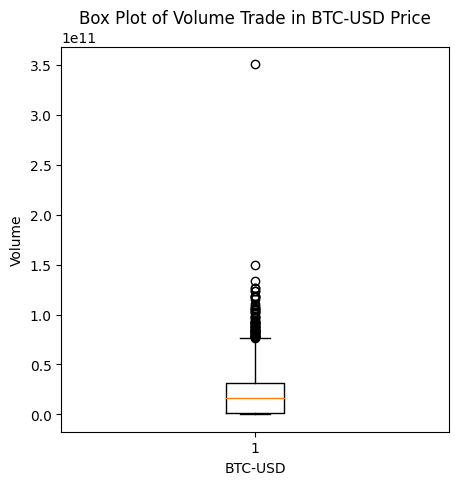

In [42]:
plt.figure(figsize=(5,5))

plt.boxplot(df_btc_usd['Volume'], vert=True)

plt.title('Box Plot of Volume Trade in BTC-USD Price')
plt.ylabel('Volume')
plt.xlabel('BTC-USD')

plt.show()

# Tranding Indicators Test
---

This indicator compare the price moving average of 7 days vs 40 days

When MA 7 > MA 40 = BUY

When MA 7 < MA 40 = SOLD

## Moving Average 7 and 40 days - Trade Strategy

In [43]:
df_MA_trade_btc_usd = df_btc_usd.copy()

In [44]:
# Calculate MA values
df_MA_trade_btc_usd['MA_short'] = df_MA_trade_btc_usd['Adj Close'].rolling(window=7).mean()
df_MA_trade_btc_usd['MA_long'] = df_MA_trade_btc_usd['Adj Close'].rolling(window=40).mean()

# Creating Order column
df_MA_trade_btc_usd['Order'] = 0
df_MA_trade_btc_usd.loc[(df_MA_trade_btc_usd['MA_short'] > df_MA_trade_btc_usd['MA_long']), 'Order'] = 1
df_MA_trade_btc_usd.loc[(df_MA_trade_btc_usd['MA_short'] < df_MA_trade_btc_usd['MA_long']), 'Order'] = -1

# Calculate return
df_MA_trade_btc_usd["MA_return"] = df_MA_trade_btc_usd["Auto_pct"] * df_MA_trade_btc_usd["Order"]

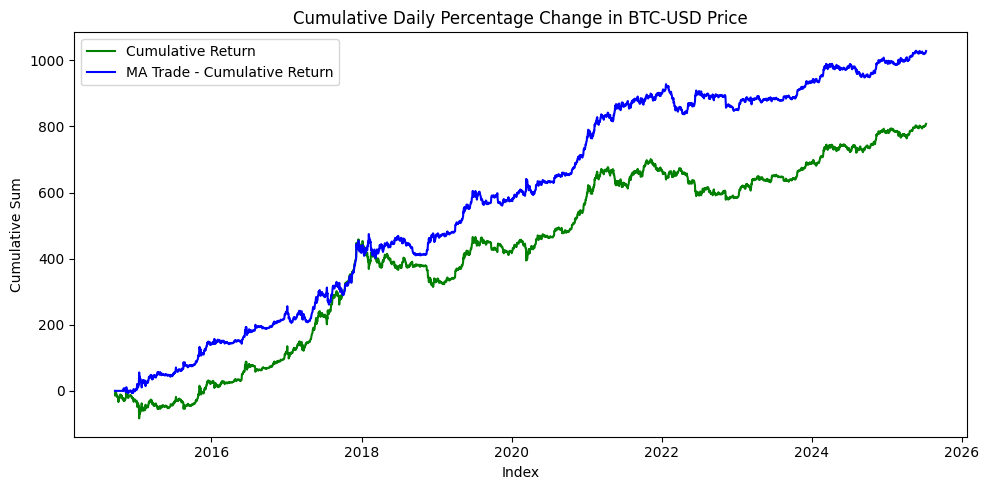

In [45]:
df_MA_trade_btc_usd['Cumulative_MA_return'] = df_MA_trade_btc_usd['MA_return'].cumsum()

plt.figure(figsize=(10, 5))

plt.plot(df_MA_trade_btc_usd['Date'], df_MA_trade_btc_usd['Cumulative_Auto_pct']*100, linestyle='-', color='green', label='Cumulative Return')
plt.plot(df_MA_trade_btc_usd['Date'], df_MA_trade_btc_usd['Cumulative_MA_return']*100, linestyle='-', color='blue', label='MA Trade - Cumulative Return')

plt.title('Cumulative Daily Percentage Change in BTC-USD Price')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')

plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

## Moving Average 7 and 40 days - Buy and Sold Strategy

In [46]:
df_MA_buysold_btc_usd = df_btc_usd.copy()

In [47]:
# Calculate the MA to short and long period
df_MA_buysold_btc_usd['MA_short'] = df_MA_buysold_btc_usd['Adj Close'].rolling(window=7).mean()
df_MA_buysold_btc_usd['MA_long'] = df_MA_buysold_btc_usd['Adj Close'].rolling(window=40).mean()

# Check the positon of MA values with short days as reference
df_MA_buysold_btc_usd['MA_short_over_MA_long'] = (df_MA_buysold_btc_usd['MA_short'] > df_MA_buysold_btc_usd['MA_long'])
df_MA_buysold_btc_usd['MA_short_under_MA_long'] = (df_MA_buysold_btc_usd['MA_short'] < df_MA_buysold_btc_usd['MA_long'])

# Map changes on position
df_MA_buysold_btc_usd['CHANGE_MA'] = (df_MA_buysold_btc_usd['MA_short_over_MA_long'] != df_MA_buysold_btc_usd['MA_short_over_MA_long'].shift(1))

# Crate the ORDER indicator
df_MA_buysold_btc_usd['ORDER'] = '-'

df_MA_buysold_btc_usd.loc[(df_MA_buysold_btc_usd['CHANGE_MA'] == True) & (df_MA_buysold_btc_usd['MA_short_over_MA_long'] == True), 'ORDER'] = 'BUY'
df_MA_buysold_btc_usd.loc[(df_MA_buysold_btc_usd['CHANGE_MA'] == True) & (df_MA_buysold_btc_usd['MA_short_under_MA_long'] == True), 'ORDER'] = 'SOLD'

# Calculate the return after the SOLD

df_MA_buysold_return = df_MA_buysold_btc_usd[df_MA_buysold_btc_usd['ORDER'] != '-']

df_MA_buysold_return.loc[(df_MA_buysold_return['ORDER'] == 'SOLD'), 'Return'] = ((df_MA_buysold_return['Adj Close']/df_MA_buysold_return['Adj Close'].shift(1))-1)

df_MA_buysold_return.fillna(0, inplace=True)

# Merge the return with the MA database

df_MA_buysold_btc_usd = pd.merge(df_MA_buysold_btc_usd, df_MA_buysold_return[['Date', 'Return']], on='Date', how='left')

df_MA_buysold_btc_usd.fillna(0, inplace=True)

C:\Users\math_\AppData\Local\Temp\ipykernel_15608\4249265192.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MA_buysold_return.loc[(df_MA_buysold_return['ORDER'] == 'SOLD'), 'Return'] = ((df_MA_buysold_return['Adj Close']/df_MA_buysold_return['Adj Close'].shift(1))-1)
C:\Users\math_\AppData\Local\Temp\ipykernel_15608\4249265192.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MA_buysold_return.fillna(0, inplace=True)


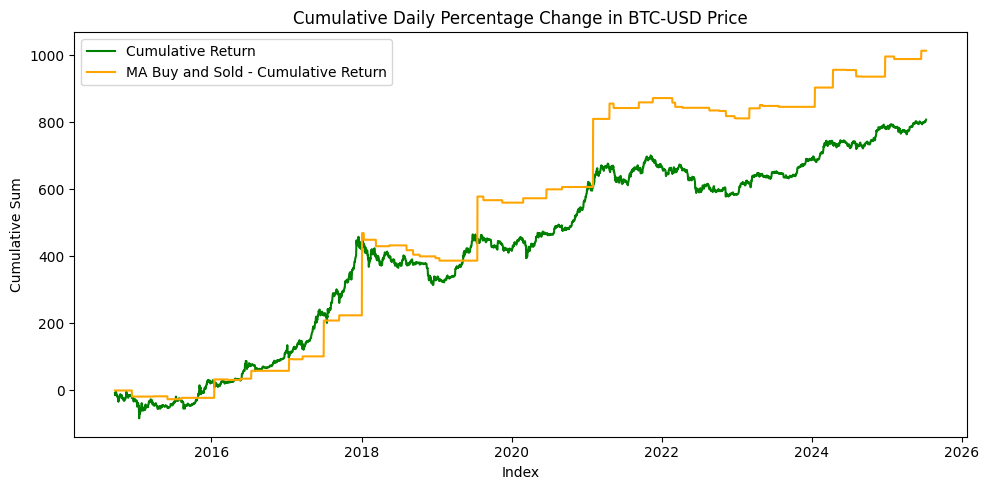

In [48]:
df_MA_buysold_btc_usd['Cumulative_MA_return'] = df_MA_buysold_btc_usd['Return'].cumsum()

plt.figure(figsize=(10, 5))

plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['Cumulative_Auto_pct']*100, linestyle='-', color='green', label='Cumulative Return')
plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['Cumulative_MA_return']*100, linestyle='-', color='orange', label='MA Buy and Sold - Cumulative Return')

plt.title('Cumulative Daily Percentage Change in BTC-USD Price')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')

plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()


# Comparing returns

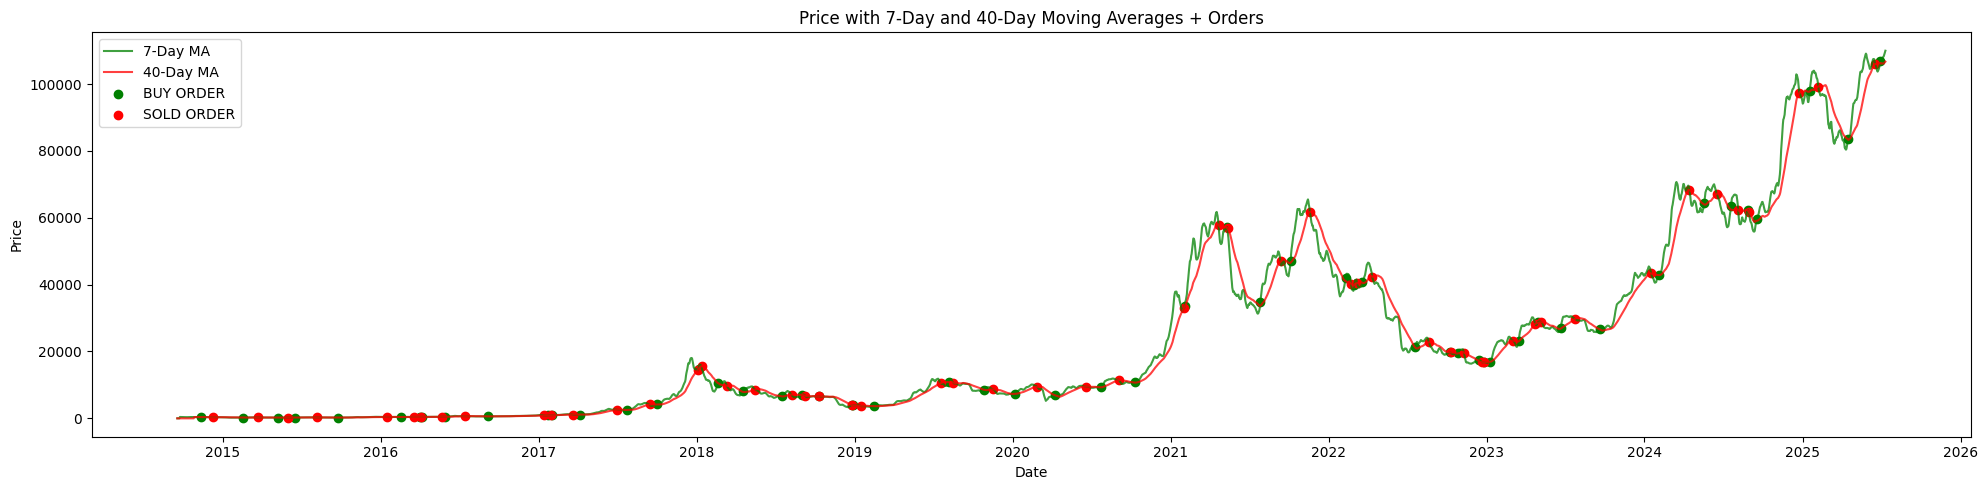

In [49]:
plt.figure(figsize=(20, 5))

plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['MA_short'], label='7-Day MA', color='green', alpha=0.75)
plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['MA_long'], label='40-Day MA', color='red', alpha=0.75)

# Target the BUY points
high_points = df_MA_buysold_btc_usd[df_MA_buysold_btc_usd['ORDER'] == 'BUY']
plt.scatter(high_points['Date'], high_points['MA_short'], color='green', marker='o', label='BUY ORDER')

# Target the SOLD points
low_points = df_MA_buysold_btc_usd[df_MA_buysold_btc_usd['ORDER'] == 'SOLD']
plt.scatter(low_points['Date'], low_points['MA_long'], color='red', marker='o', label='SOLD ORDER')

plt.title('Price with 7-Day and 40-Day Moving Averages + Orders')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(False)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

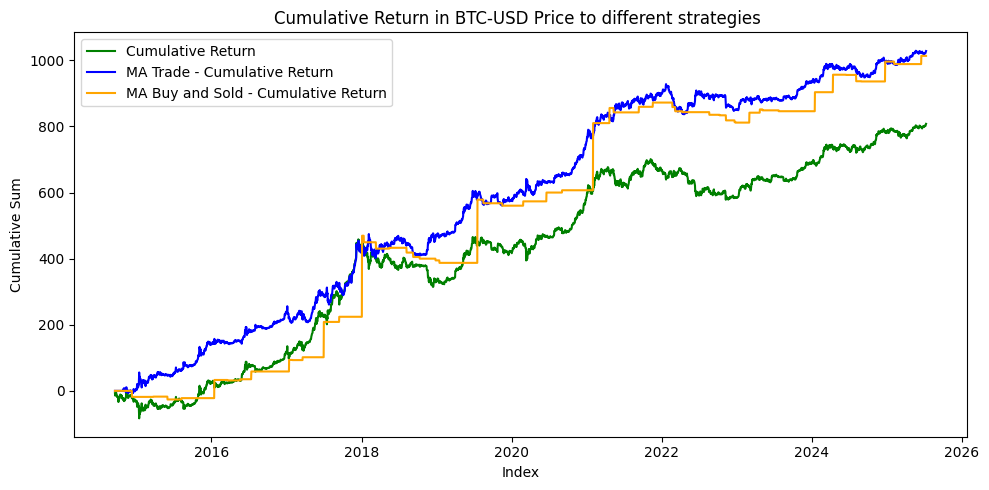

In [50]:
df_MA_buysold_btc_usd['Cumulative_MA_return'] = df_MA_buysold_btc_usd['Return'].cumsum()

plt.figure(figsize=(10, 5))

plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['Cumulative_Auto_pct']*100, linestyle='-', color='green', label='Cumulative Return')
plt.plot(df_MA_trade_btc_usd['Date'], df_MA_trade_btc_usd['Cumulative_MA_return']*100, linestyle='-', color='blue', label='MA Trade - Cumulative Return')
plt.plot(df_MA_buysold_btc_usd['Date'], df_MA_buysold_btc_usd['Cumulative_MA_return']*100, linestyle='-', color='orange', label='MA Buy and Sold - Cumulative Return')

plt.title('Cumulative Return in BTC-USD Price to different strategies ')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')

plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()


BTC percent return over the days = 617,9099 %

BTC percent return with MA Trade Strategy = 735,9885 %

BTC percent return with MA Buy and Sold Strategy = 840,8983 %